# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv("train_house.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
house.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [40]:
total_null = house.isnull().sum().sort_values(ascending=False)
percent_null = (house.isnull().sum() / house.isnull().count().sort_values(ascending=False))
total = pd.concat([total_null,percent_null], axis=1, keys=["Total","Percent"])
print(total)

             Total   Percent
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
MasVnrType     872  0.597260
...            ...       ...
ExterQual        0  0.000000
Exterior2nd      0  0.000000
Exterior1st      0  0.000000
RoofMatl         0  0.000000
SalePrice        0  0.000000

[81 rows x 2 columns]


In [86]:
# Drop variabel NaN
#house.dropna()
for column in house.columns :
    print("==={column}===")
    display(house[column].value_counts())
    print("===========")

==={column}===


Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

==={column}===


MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

==={column}===


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

==={column}===


LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64

==={column}===


Street
Pave    1454
Grvl       6
Name: count, dtype: int64

==={column}===


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

==={column}===


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

==={column}===


Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

==={column}===


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

==={column}===


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

==={column}===


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

==={column}===


Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

==={column}===


Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

==={column}===


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

==={column}===


HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

==={column}===


OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

==={column}===


OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

==={column}===


YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

==={column}===


YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: count, Length: 61, dtype: int64

==={column}===


RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

==={column}===


RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

==={column}===


Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

==={column}===


Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

==={column}===


ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

==={column}===


ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

==={column}===


Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

==={column}===


BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

==={column}===


BsmtFinSF2
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: count, Length: 144, dtype: int64

==={column}===


BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: count, Length: 780, dtype: int64

==={column}===


TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: count, Length: 721, dtype: int64

==={column}===


Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

==={column}===


HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

==={column}===


CentralAir
Y    1365
N      95
Name: count, dtype: int64

==={column}===


1stFlrSF
864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: count, Length: 753, dtype: int64

==={column}===


2ndFlrSF
0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: count, Length: 417, dtype: int64

==={column}===


LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64

==={column}===


GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: count, Length: 861, dtype: int64

==={column}===


BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

==={column}===


BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64

==={column}===


FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

==={column}===


HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

==={column}===


BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64

==={column}===


KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

==={column}===


KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

==={column}===


TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

==={column}===


Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

==={column}===


Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

==={column}===


GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

==={column}===


GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64

==={column}===


PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

==={column}===


WoodDeckSF
0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: count, Length: 274, dtype: int64

==={column}===


OpenPorchSF
0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: count, Length: 202, dtype: int64

==={column}===


EnclosedPorch
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: count, Length: 120, dtype: int64

==={column}===


3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64

==={column}===


ScreenPorch
0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: count, Length: 76, dtype: int64

==={column}===


PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

==={column}===


MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

==={column}===


MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

==={column}===


YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

==={column}===


SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

==={column}===


SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

==={column}===


SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

In [59]:
house = house.dropna(axis=1)

In [89]:
# Memisahkan data menjadi numerikal & kategorikal
house_numerik = house._get_numeric_data()
house_cat = house.select_dtypes(include=["object"])
#print(house_numerik.head())
#print(house_cat.head())


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

In [71]:
### Tulis kode Anda di sini
house_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

<Axes: ylabel='Utilities'>

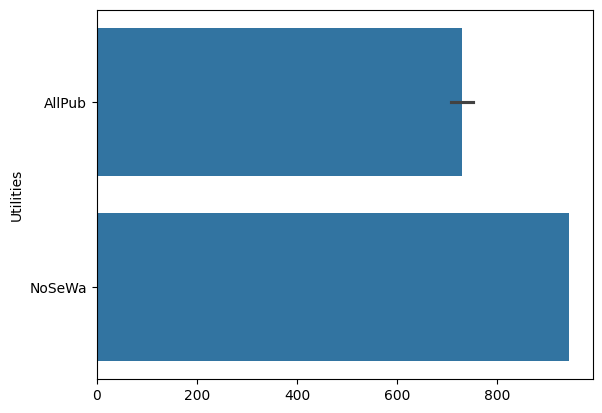

In [97]:
#house_cat["Utilities"].info()
# for column in house_cat.columns :
#     print("==={column}===")
#     display(house_cat[column].value_counts())
#     print("===========")
#house_cat.head()
sns.barplot(house_cat["Utilities"])

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: ylabel='HouseStyle'>

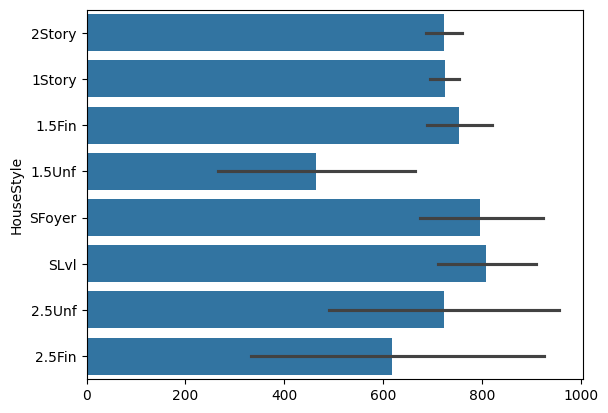

In [102]:
### Tulis kode Anda di sini
sns.barplot(house_cat["HouseStyle"])

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

<Axes: ylabel='ExterQual'>

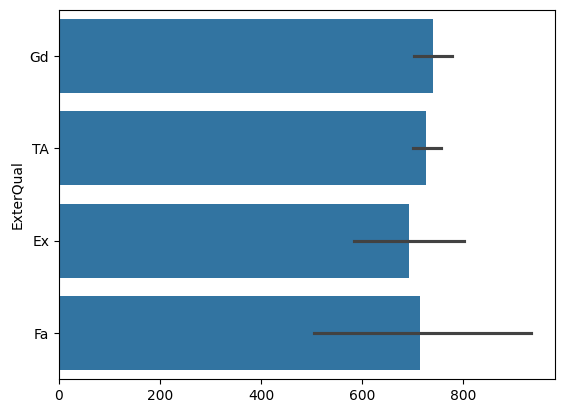

In [101]:
### Tulis kode Anda di sini
sns.barplot(house_cat["ExterQual"])

#### **Analisis tentang variabel kategorikal**

* [*tulis analisis dan pertanyaan Anda di sini*]
Analisis
1. Banyak terdapat Utilities dengan kategori NoSewa yang di Jual dari pada AllPub
2. Untuk house style dengan kategori SLv1 (Split Level) lebih banyak dari pada Kategori house style lainnya
3. Untuk kualitas material eksterior (ExterQual) dengan kategori Good lebih banyak di jual dari kategori lainnya.
Pertanyaan
1. mengapa banyak Rumah dijual dengan Kualitas material Eskterior yang bagus?


## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [103]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
house_numerik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [104]:
print("Median Price : ", stats.median(house_numerik["SalePrice"]))
print("Mean Price : ", stats.mean(house_numerik["SalePrice"]))
print("Standar Dev Price : ", np.std(house_numerik["SalePrice"]))

Median Price :  163000.0
Mean Price :  180921.19589041095
Standar Dev Price :  79415.29188606751


#### **Analisis tentang variabel `SalePrice`**

* [*tulis analisis dan pertanyaan Anda di sini*]
1. Nilai Mean lebih besar dari nilai Median dari kolom AllPrice
### pertanyaan
1. Mengapa nilai Mean lebih tinggi dari Nilai Median?

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [108]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print("Median Luas Area : ", stats.median(house_numerik["GrLivArea"]))
print("Mean Luas Area : ", stats.mean(house_numerik["GrLivArea"]))
print("Standar Dev Luas Area : ", np.std(house_numerik["GrLivArea"]))

Median Luas Area :  1464.0
Mean Luas Area :  1515.463698630137
Standar Dev Luas Area :  525.3003935623227


#### **Analisis tentang variabel `GrlivArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]
1. Rata-rata luas Area dari rumah yang dijual adalah 1515.45
* Pertanyaan
1. mengapa Nilai Mean dekat dengan nilai Median?

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [109]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print("Median Luas Garasi : ", stats.median(house_numerik["GarageArea"]))
print("Mean Luas Garasi : ", stats.mean(house_numerik["GarageArea"]))
print("Standar Dev Luas Garasi : ", np.std(house_numerik["GarageArea"]))

Median Luas Garasi :  480.0
Mean Luas Garasi :  472.9801369863014
Standar Dev Luas Garasi :  213.73160807515626


#### **Analisis tentang variabel `GarageArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]
1. Rata-rata garasi yang di Jual mempunyai luas 472.98
* pertanyaan
1. mengapa Nilai Mean Mendekati Nilai Median di Column GarageArea?
2. Berapa Jumlah Rumah yang tidak mempunyai Garasi?

## Pemrosesan Data Variabel Numerikal

In [111]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

print("Median Price : ", stats.median(np.log10(house_numerik["SalePrice"])))
print("Mean Price : ", stats.mean(np.log10(house_numerik["SalePrice"])))
print("Standar Dev Price : ", np.std(np.log10(house_numerik["SalePrice"])))

Median Price :  5.212187604403958
Mean Price :  5.221978956475628
Standar Dev Price :  0.17342032112458186


In [112]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print("Median Luas Area : ", stats.median(np.log10(house_numerik["GrLivArea"])))
print("Mean Luas Area : ", stats.mean(np.log10(house_numerik["GrLivArea"])))
print("Standar Dev Luas Area : ", np.std(np.log10(house_numerik["GrLivArea"])))

Median Luas Area :  3.165541076722373
Mean Luas Area :  3.1563543103897778
Standar Dev Luas Area :  0.14480949091518763


In [122]:
# Menghilangkan nilai nol pada GarageArea
house_garageNotNull = house_numerik[house_numerik["GarageArea"]!=0]
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
#house_garageNotNull["GarageArea"]
print("Median Luas Garasi : ", stats.median(np.log10(house_garageNotNull["GarageArea"])))
print("Mean Luas Garasi : ", stats.mean(np.log10(house_garageNotNull["GarageArea"])))
print("Standar Dev Luas Garasi : ", np.std(np.log10(house_garageNotNull["GarageArea"])))

Median Luas Garasi :  2.6848453616444123
Mean Luas Garasi :  2.6696154158200915
Standar Dev Luas Garasi :  0.1642188306108688


#### **Penjelasan dan analisis tentang pemrosesan data**

* [*tulis penjelasan dan analisis Anda di sini*]

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

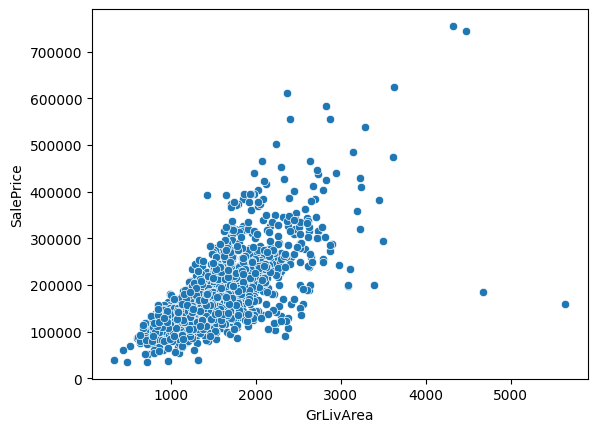

In [124]:
sns.scatterplot(data=house, x="GrLivArea", y="SalePrice")

# `GarageArea` dengan `SalePrice`

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

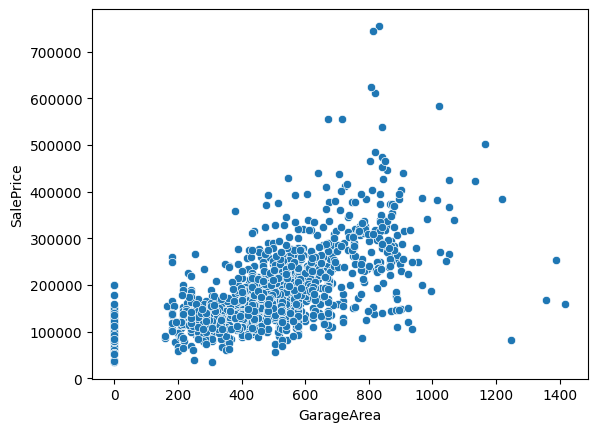

In [125]:
sns.scatterplot(data=house, x="GarageArea", y="SalePrice")

#### **Hipotesis tentang hubungan antar-variabel**

* [*tulis hipotesis Anda di sini*]
1. Semakin Luas Area maka harga Rumah semakin mahal
2. Semakin luas garasi maka harga jual rumah akan Semakin Tinggi